#  Simple tool to analyze data from https://data.europa.eu/

The EU Open Data Portal (EU ODP) aims to encourage the use of EU datasets for building third-party applications.

**Note:** This is a Jupyter notebook which is also available as its executable export as a Python 3 script (therefore with automatically generated comments).

# Libraries

In [1]:
# Sys import
import sys, os, re
# Common imports
import math
import numpy             as NP
import numpy.random      as RAND
import scipy.stats       as STATS
from scipy import sparse
from scipy import linalg

# Better formatting functions
from IPython.display import display, HTML
from IPython import get_ipython

import matplotlib        as MPL
import matplotlib.pyplot as PLT
import seaborn as SNS
SNS.set(font_scale=1)

# Python programming
from itertools import cycle
from time import time
import datetime

# Using pandas
import pandas as PAN
import xlrd
import numpy as NP

In [2]:
import warnings
warnings.filterwarnings('ignore')
print("For now, reduce python warnings, I will look into this later")

For now, reduce python warnings, I will look into this later


### Import my own modules
The next cell attempts to give user some information if things improperly setup.
Intended to work both in Jupyter and when executing the Python file directly.

In [3]:
if not get_ipython() is None and os.path.abspath("../source/") not in sys.path:
    sys.path.append(os.path.abspath("../source/"))
try:
    from lib.utilities     import *
    from lib.figureHelpers import *
    from lib.DataMgrRdf        import *
    import lib.basicDataCTE as DCTE
except Exception as err:
    print("Could not find library 'lib' with contents 'DataGouvFr' ")
    if get_ipython() is None:
        print("Check the PYTHONPATH environment variable which should point to 'source' wich contains 'lib'")
    else:
        print("You are supposed to be running in JupySessions, and '../source/lib' should exist")
    raise err

Loaded lib
For now, reduce python warnings, I will look into this later


## Check environment

It is expected that:
- your working directory is named `JupySessions`, 
- that it has subdirectories 
   - `images/*` where generated images may be stored to avoid overcrowding. 
- At the same level as your working dir there should be directories 
   - `../data` for storing input data and 
   - `../source` for python scripts.
   
My package library is in `../source/lib`, and users running under Python (not in Jupyter) should
set their PYTHONPATH to include "../source" ( *or whatever appropriate* ).

In [4]:
checkSetup(chap="Chap03")
ImgMgr = ImageMgr(chapdir="Chap03")

# Load Data

## Functions

## Load CSV and XLSX data from remote 
The `dataFileVMgr` will manage a cache of data files in `../dataEURdf`, the data will be downloaded
from  https://data.europa.eu using the SPARQL query endpoint. The meta information is stored/cached  in `../dataEURdf/.cache*`

We check what is in the cache/data directory; for each file, we identify the latest version, 
and list this below to make sure. The file name will usually contain a time stamp.

<FONT COLOR="RED">TO BE CHECKED For the files used in this notebook, the latest version is used/loaded irrespective of the
timestamp used in the notebook.</FONT>

In [7]:
dataFileVMgr = manageAndCacheDataFilesRdfEU( "../dataEURdf", maxDirSz= 180*(2**10)**2)
dataFileVMgr.getRemoteInfo()

Loaded pickle from ../dataEURdf/.cache.rdf, loaded 3h 46m 26s ago (367138 elts)
cache metadata:{   'HTTP:Hdr:resp': {'Date': 'Sun, 04 Apr 2021 12:30:49 GMT', 'Content-Type': 'application/rdf+xml; charset=UTF-8', 'Access-Control-Allow-Origin': '*', 'Server': 'Europa', 'Connection': 'close', 'Content-Encoding': 'gzip'},
    'HTTP:Hdr:rqt': {'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': 'application/rdf+xml', 'Connection': 'keep-alive', 'Content-Type': 'application/rdf+xml', 'Content-Length': '0'},
    'HTTP:Query:Sparql': '\n'
                         'PREFIX http: <http://www.w3.org/2011/http#>\n'
                         'PREFIX dcat: <http://www.w3.org/ns/dcat#>\n'
                         'PREFIX odp:  <http://data.europa.eu/euodp/ontologies/ec-odp#>\n'
                         'PREFIX dc: <http://purl.org/dc/terms/>\n'
                         'PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>\n'
                         'PREFIX foaf: <http://xm

Loading ../dataEURdf/.cache.prdf as xml... 

Parsed ../dataEURdf/.cache.prdf


done.	(18317 triples)


This can be long, the SPARQL processor used is not fast

In [8]:
dataFileVMgr.updatePrepare()
dataFileVMgr.cacheUpdate()

URL=https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/data.csv
dsURI=http://data.europa.eu/88u/dataset/covid-19-coronavirus-data-daily-up-to-14-december-2020
fn=covid-19-coronavirus-data-daily-up-to-14-december-2020
qn='ns1:DAILY'	mod=None
URL=https://opendata.ecdc.europa.eu/covid19/casedistribution/json
dsURI=http://data.europa.eu/88u/dataset/covid-19-coronavirus-data-daily-up-to-14-december-2020
fn=covid-19-coronavirus-data-daily-up-to-14-december-2020
qn='ns1:DAILY'	mod=None
URL=https://opendata.ecdc.europa.eu/covid19/casedistribution/xml
dsURI=http://data.europa.eu/88u/dataset/covid-19-coronavirus-data-daily-up-to-14-december-2020
fn=covid-19-coronavirus-data-daily-up-to-14-december-2020
qn='ns1:DAILY'	mod=None
URL=https://opendata.ecdc.europa.eu/covid19/nationalcasedeath/csv
dsURI=http://data.europa.eu/88u/dataset/covid-19-coronavirus-data-weekly-from-17-december-2020
fn=covid-19-coronavirus-data-weekly-from-17-december-2020
qn='ns1:WEEKLY'	mod=None
URL=https://opendata

Unexpected file extension (json) or subdir casedistribution locationfor URL:
	https://opendata.ecdc.europa.eu/covid19/casedistribution/json
Unexpected file extension (xml) or subdir casedistribution locationfor URL:
	https://opendata.ecdc.europa.eu/covid19/casedistribution/xml
Unexpected file extension (csv) or subdir nationalcasedeath locationfor URL:
	https://opendata.ecdc.europa.eu/covid19/nationalcasedeath/csv
Unexpected file extension (json) or subdir nationalcasedeath locationfor URL:
	https://opendata.ecdc.europa.eu/covid19/nationalcasedeath/json
Unexpected file extension (xlsx) or subdir nationalcasedeath locationfor URL:
	https://opendata.ecdc.europa.eu/covid19/nationalcasedeath/xlsx
Unexpected file extension (xml) or subdir nationalcasedeath locationfor URL:
	https://opendata.ecdc.europa.eu/covid19/nationalcasedeath/xml
Unexpected file extension (xlsx) or subdir documents locationfor URL:
	https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribut

Wrote file 	'../dataEURdf/covid-19-coronavirus-data-weekly-from-17-december-2020.csv'
	from URL:'https://opendata.ecdc.europa.eu/covid19/nationalcasedeath/csv'
About to load file ../dataEURdf/covid-19-coronavirus-data-weekly-from-17-december-2020.json, available space is 113910829
Wrote file 	'../dataEURdf/covid-19-coronavirus-data-weekly-from-17-december-2020.json'
	from URL:'https://opendata.ecdc.europa.eu/covid19/nationalcasedeath/json'
About to load file ../dataEURdf/covid-19-coronavirus-data-weekly-from-17-december-2020.xlsx, available space is 105866566
Wrote file 	'../dataEURdf/covid-19-coronavirus-data-weekly-from-17-december-2020.xlsx'
	from URL:'https://opendata.ecdc.europa.eu/covid19/nationalcasedeath/xlsx'
About to load file ../dataEURdf/covid-19-coronavirus-data-weekly-from-17-december-2020.xml, available space is 104691992
Wrote file 	'../dataEURdf/covid-19-coronavirus-data-weekly-from-17-december-2020.xml'
	from URL:'https://opendata.ecdc.europa.eu/covid19/nationalcasede

## Get some understanding of the available resource

In [9]:
nbLastDays = 30

## Dig into the data

In [10]:
print("Most recent versions of files in data directory:")
for f in dataFileVMgr.listMostRecent(nonTS=True) :
    print(f"\t{f}")

Most recent versions of files in data directory:
	.cache.prdf
	.cache.qhash
	.cache.rdf
	covid-19-coronavirus-data-daily-up-to-14-december-2020.csv
	covid-19-coronavirus-data-daily-up-to-14-december-2020.json
	covid-19-coronavirus-data-daily-up-to-14-december-2020.xlsx
	covid-19-coronavirus-data-daily-up-to-14-december-2020.xml
	covid-19-coronavirus-data-weekly-from-17-december-2020.csv
	covid-19-coronavirus-data.csv
	covid-19-coronavirus-data.json
	news-and-press-releases-on-covid-19-pandemic-from-the-european-medicines-agency-ema.html


In [11]:
last = lambda x: dataFileVMgr.getRecentVersion(x,default=os.path.join(dataFileVMgr.dirpath,x))

In [12]:
dataFileVMgr.nonTSFiles

{'news-and-press-releases-on-covid-19-pandemic-from-the-european-medicines-agency-ema.html': None,
 '.cache.rdf': None,
 'covid-19-coronavirus-data.csv': None,
 'covid-19-coronavirus-data-daily-up-to-14-december-2020.xml': None,
 '.cache.prdf': None,
 'covid-19-coronavirus-data-weekly-from-17-december-2020.csv': None,
 'covid-19-coronavirus-data-daily-up-to-14-december-2020.xlsx': None,
 '.cache.qhash': None,
 'covid-19-coronavirus-data.json': None,
 'covid-19-coronavirus-data-daily-up-to-14-december-2020.json': None,
 'covid-19-coronavirus-data-daily-up-to-14-december-2020.csv': None}

In [13]:
covidDataEUCsv = last("covid-19-coronavirus-data.csv")
data_covidDataEU  = read_csvPandas(covidDataEUCsv , error_bad_lines=False,sep="," )

In [14]:
data_covidDataEU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9791 entries, 0 to 9790
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   dateRep                                          9791 non-null   object 
 1   year_week                                        9791 non-null   object 
 2   cases_weekly                                     9791 non-null   int64  
 3   deaths_weekly                                    9791 non-null   int64  
 4   countriesAndTerritories                          9791 non-null   object 
 5   geoId                                            9747 non-null   object 
 6   countryterritoryCode                             9769 non-null   object 
 7   popData2019                                      9769 non-null   float64
 8   continentExp                                     9791 non-null   object 
 9   notification_rate_per_100000_p

After the transformation to weekly data, check that numbers are really weekly, dates appear in 'DateRep' and also in 'year_week' in distinct formats. Checked weekly results with "StopCovid" application at https://www.gouvernement.fr/info-coronavirus/tousanticovid (still factor 2 discrepancy ?) .

In [15]:
msk= data_covidDataEU.loc[:,'countriesAndTerritories'] == 'France'
data_covidDataEU[msk].iloc[:3]

,dateRep,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days
3218,11/01/2021,2021-01,127528,2713,France,FR,FRA,67012883.0,Europe,329.21
3219,04/01/2021,2020-53,93082,1928,France,FR,FRA,67012883.0,Europe,272.15
3220,28/12/2020,2020-52,89292,2560,France,FR,FRA,67012883.0,Europe,277.25


In [16]:
def sortedIds(df,col):
   t=df.loc[:,col].unique()
   return sorted([ x  for x in t if isinstance(x, str) ])

In [17]:
data_covidDataEU.columns

Index(['dateRep', 'year_week', 'cases_weekly', 'deaths_weekly',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'notification_rate_per_100000_population_14-days'],
      dtype='object')

This seems necessary, since there were NaNs in the "geoId" column

In [18]:
for coln in ("geoId" , "countryterritoryCode", "countriesAndTerritories"):
    si = sortedIds(data_covidDataEU, coln)
    print(f"{coln:30}-> {len(si)} elts")

geoId                         -> 214 elts
countryterritoryCode          -> 213 elts
countriesAndTerritories       -> 215 elts


In [19]:
data_covidDataEU["date"] = PAN.to_datetime(data_covidDataEU.loc[:,"dateRep"], format="%d/%m/%Y")

In [20]:
dateStart = data_covidDataEU["date"].min()
dateEnd   = data_covidDataEU["date"].max() 
dateSpan  = dateEnd - dateStart 
print(f"Our statistics span {dateSpan.days+1} days, start: {dateStart} and end {dateEnd}")

data_covidDataEU["elapsedDays"] = (data_covidDataEU["date"] - dateStart).dt.days

Our statistics span 372 days, start: 2020-01-06 00:00:00 and end 2021-01-11 00:00:00


In [21]:
data_covidDataEU["elapsedDays"][:3] 

0    371
1    364
2    357
Name: elapsedDays, dtype: int64

In [22]:
dt  = data_covidDataEU.copy()
dt = dt.set_index("continentExp")

In [23]:
dtx = dt[dt.index == "Europe"]
dtg = dtx.groupby("countriesAndTerritories")

In [24]:
for (country,dfExtract) in dtg:
    print(f"{country:30}\t-> data over {dfExtract.shape[0]*7} days")

Albania                       	-> data over 315 days
Andorra                       	-> data over 308 days
Armenia                       	-> data over 378 days
Austria                       	-> data over 378 days
Azerbaijan                    	-> data over 378 days
Belarus                       	-> data over 378 days
Belgium                       	-> data over 378 days
Bosnia_and_Herzegovina        	-> data over 308 days
Bulgaria                      	-> data over 315 days
Croatia                       	-> data over 378 days
Cyprus                        	-> data over 308 days
Czechia                       	-> data over 378 days
Denmark                       	-> data over 378 days
Estonia                       	-> data over 378 days
Faroe_Islands                 	-> data over 315 days
Finland                       	-> data over 378 days
France                        	-> data over 378 days
Georgia                       	-> data over 378 days
Germany                       	-> data over 37

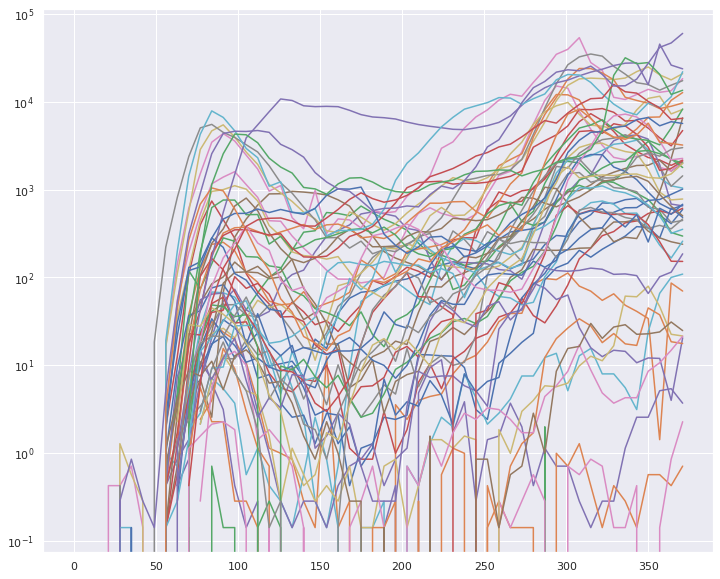

In [25]:
for (country,dfExtract) in dtg :
       #print(f"{country:30}\t-> data over {dfExtract.shape[0]} days")
       PLT.plot( dfExtract.loc[:,["elapsedDays"]], dfExtract.loc[:,["cases_weekly"]]/7)
       PLT.yscale("log")
       #painter = figureTSFromFrame(dfExtract.loc[:,["cases","deaths"]],figsize=(12,8))
       #painter.doPlot()

In [26]:
dtx = dt[ (dt.index == "Europe") & (dt["popData2019"] > 10.0e6) ]
dtg = dtx.groupby("countriesAndTerritories")
subnodeSpec=(lambda i,j:{"nrows":i,"ncols":j})(*subPlotShape(len(dtg),maxCol=4))

Country=Azerbaijan, pop:10.047719M
Country=Belgium, pop:11.455519M
Country=Czechia, pop:10.6498M
Country=France, pop:67.012883M
Country=Germany, pop:83.019213M
Country=Greece, pop:10.724599M
Country=Italy, pop:60.359546M
Country=Netherlands, pop:17.282163M
Country=Poland, pop:37.972812M
Country=Portugal, pop:10.276617M
Country=Romania, pop:19.414458M
Country=Russia, pop:145.87226M
Country=Spain, pop:46.93706M
Country=Sweden, pop:10.230185M
Country=Turkey, pop:82.003882M
Country=Ukraine, pop:43.993643M
Country=United_Kingdom, pop:66.647112M
Saving figure FIG007


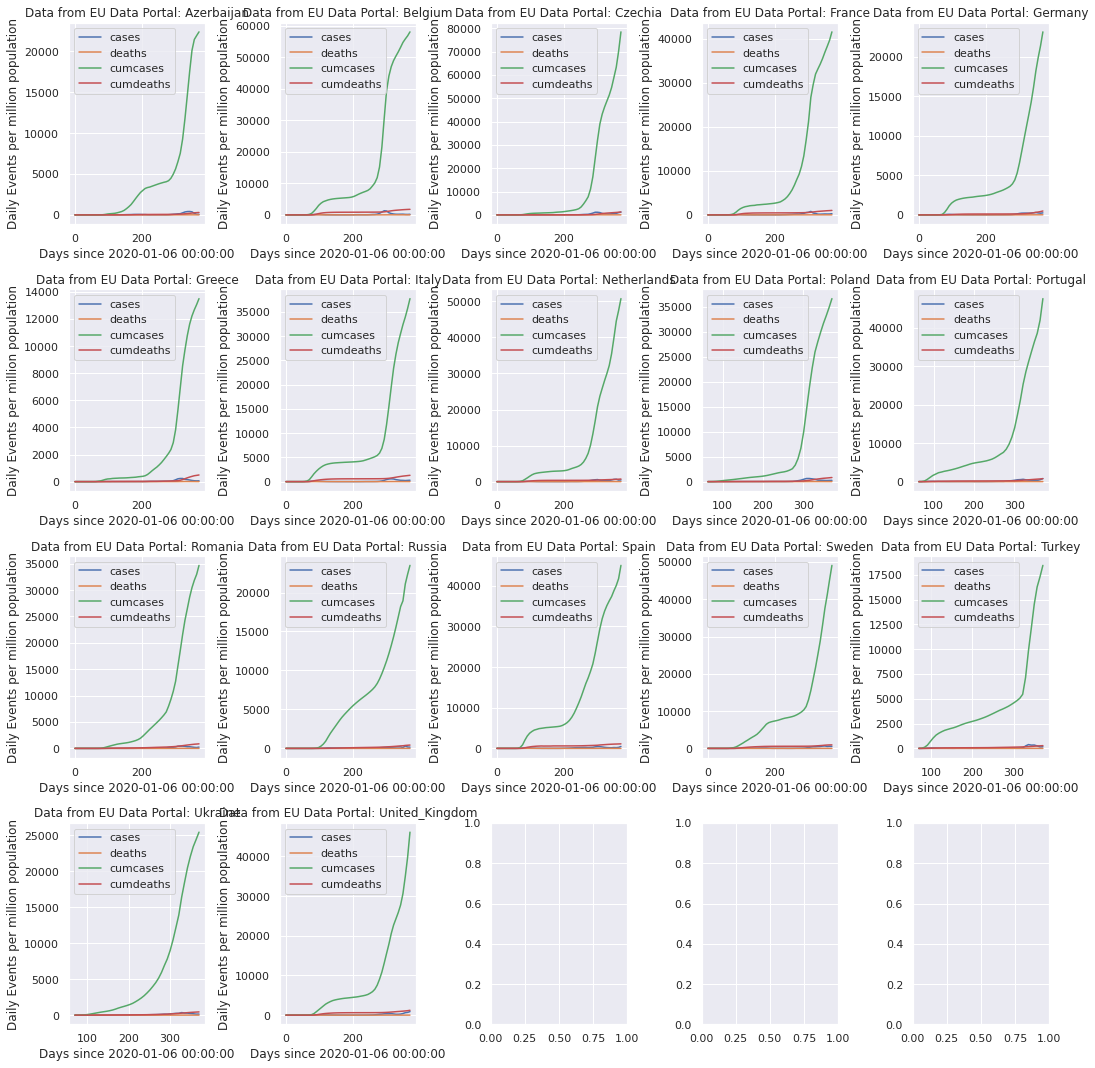

In [27]:
painter = figureFromFrame(None, subplots=subnodeSpec, figsize=(15,15))
for (country,dfExtractOrig) in dtg :
    pop = dfExtractOrig["popData2019"][0]
    print(f"Country={country}, pop:{pop/1.0E6}M")
    dfExtract = dfExtractOrig.set_index("elapsedDays").copy()
    dfExtract.loc[:,"cumcases"] = dfExtract.loc[:,"cases_weekly"].sort_index().cumsum()/dfExtract.loc[:,"popData2019"]*1.0E6
    dfExtract.loc[:,"cumdeaths"] = dfExtract.loc[:,"deaths_weekly"].sort_index().cumsum()/dfExtract.loc[:,"popData2019"]*1.0E6
    dfExtract.loc[:,"cases"] = dfExtract.loc[:,"cases_weekly"]/dfExtract.loc[:,"popData2019"]*1.0E6/7
    dfExtract.loc[:,"deaths"] = dfExtract.loc[:,"deaths_weekly"]/dfExtract.loc[:,"popData2019"]*1.0E6/7
    painter.doPlot(df = dfExtract.loc[:,["cases","deaths","cumcases","cumdeaths"]])
    painter.setAttrs(label=f"Days since {dateStart}",
                 title=f"Data from EU Data Portal: {country}",
                 legend=True,
                 xlabel=f"Days since {dateStart}",
                 ylabel="Daily Events per million population"   )
        
    painter.advancePlotIndex()  
ImgMgr.save_fig("FIG007")  

Country=Azerbaijan, pop:10.047719M
Country=Belgium, pop:11.455519M
Country=Czechia, pop:10.6498M
Country=France, pop:67.012883M
Country=Germany, pop:83.019213M
Country=Greece, pop:10.724599M
Country=Italy, pop:60.359546M
Country=Netherlands, pop:17.282163M
Country=Poland, pop:37.972812M
Country=Portugal, pop:10.276617M
Country=Romania, pop:19.414458M
Country=Russia, pop:145.87226M
Country=Spain, pop:46.93706M
Country=Sweden, pop:10.230185M
Country=Turkey, pop:82.003882M
Country=Ukraine, pop:43.993643M
Country=United_Kingdom, pop:66.647112M
Saving figure FIG017


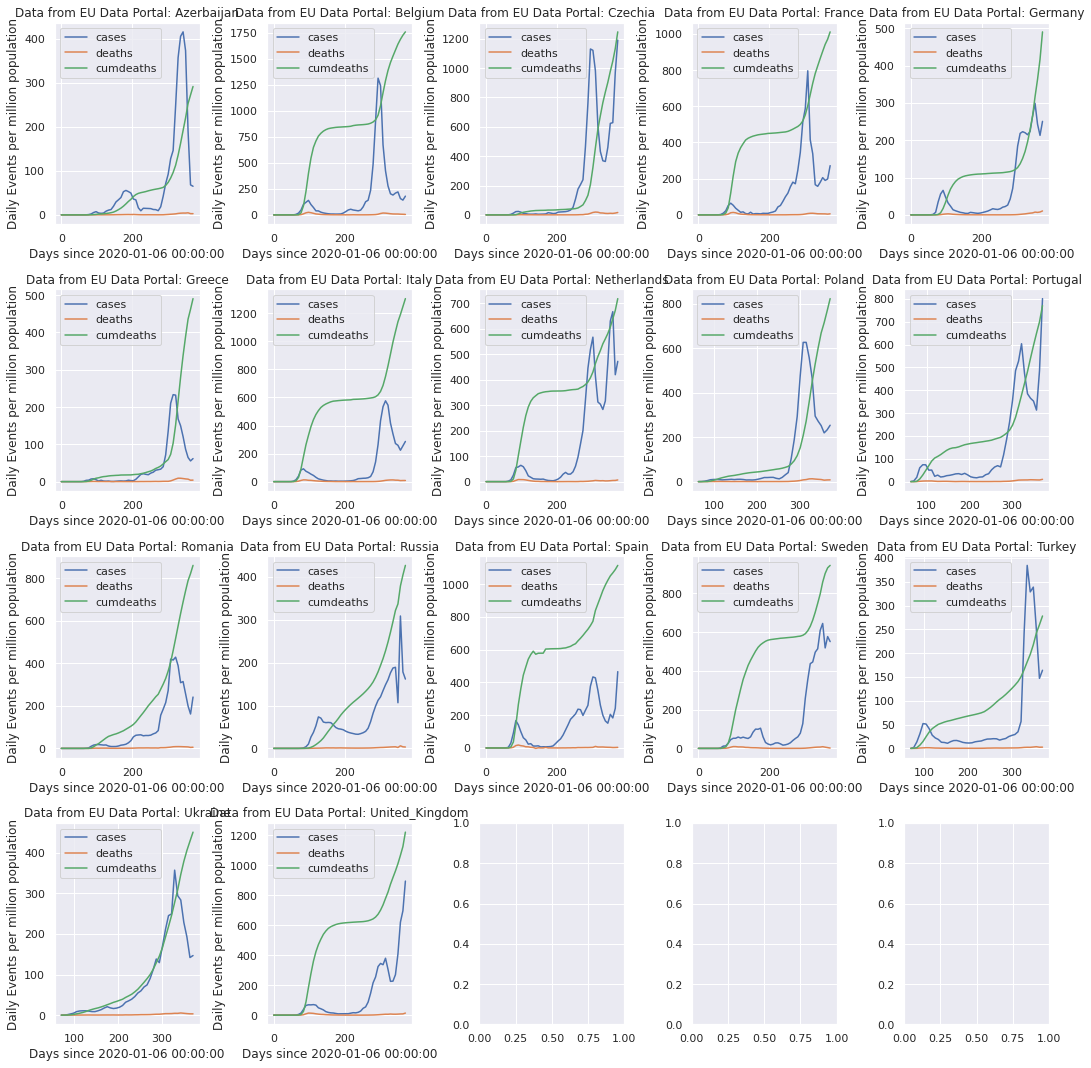

In [28]:
painter = figureFromFrame(None, subplots=subnodeSpec, figsize=(15,15))
for (country,dfExtractOrig) in dtg :
    pop = dfExtractOrig["popData2019"][0]
    print(f"Country={country}, pop:{pop/1.0E6}M")
    dfExtract = dfExtractOrig.set_index("elapsedDays").copy()
    dfExtract.loc[:,"cumdeaths"] = dfExtract.loc[:,"deaths_weekly"].sort_index().cumsum()/dfExtract.loc[:,"popData2019"]*1.0E6
    dfExtract.loc[:,"cases"] = dfExtract.loc[:,"cases_weekly"]/dfExtract.loc[:,"popData2019"]*1.0E6/7
    dfExtract.loc[:,"deaths"] = dfExtract.loc[:,"deaths_weekly"]/dfExtract.loc[:,"popData2019"]*1.0E6/7
    painter.doPlot(df = dfExtract.loc[:,["cases","deaths","cumdeaths"]])
    painter.setAttrs(label=f"Days since {dateStart}",
                 title=f"Data from EU Data Portal: {country}",
                 legend=True,
                 xlabel=f"Days since {dateStart}",
                 ylabel="Daily Events per million population"   )
        
    painter.advancePlotIndex()  
ImgMgr.save_fig("FIG017")  

Country=Azerbaijan, pop:10.047719M
Country=Belgium, pop:11.455519M
Country=Czechia, pop:10.6498M
Country=France, pop:67.012883M
Country=Germany, pop:83.019213M
Country=Greece, pop:10.724599M
Country=Italy, pop:60.359546M
Country=Netherlands, pop:17.282163M
Country=Poland, pop:37.972812M
Country=Portugal, pop:10.276617M
Country=Romania, pop:19.414458M
Country=Russia, pop:145.87226M
Country=Spain, pop:46.93706M
Country=Sweden, pop:10.230185M
Country=Turkey, pop:82.003882M
Country=Ukraine, pop:43.993643M
Country=United_Kingdom, pop:66.647112M
Saving figure FIG017B


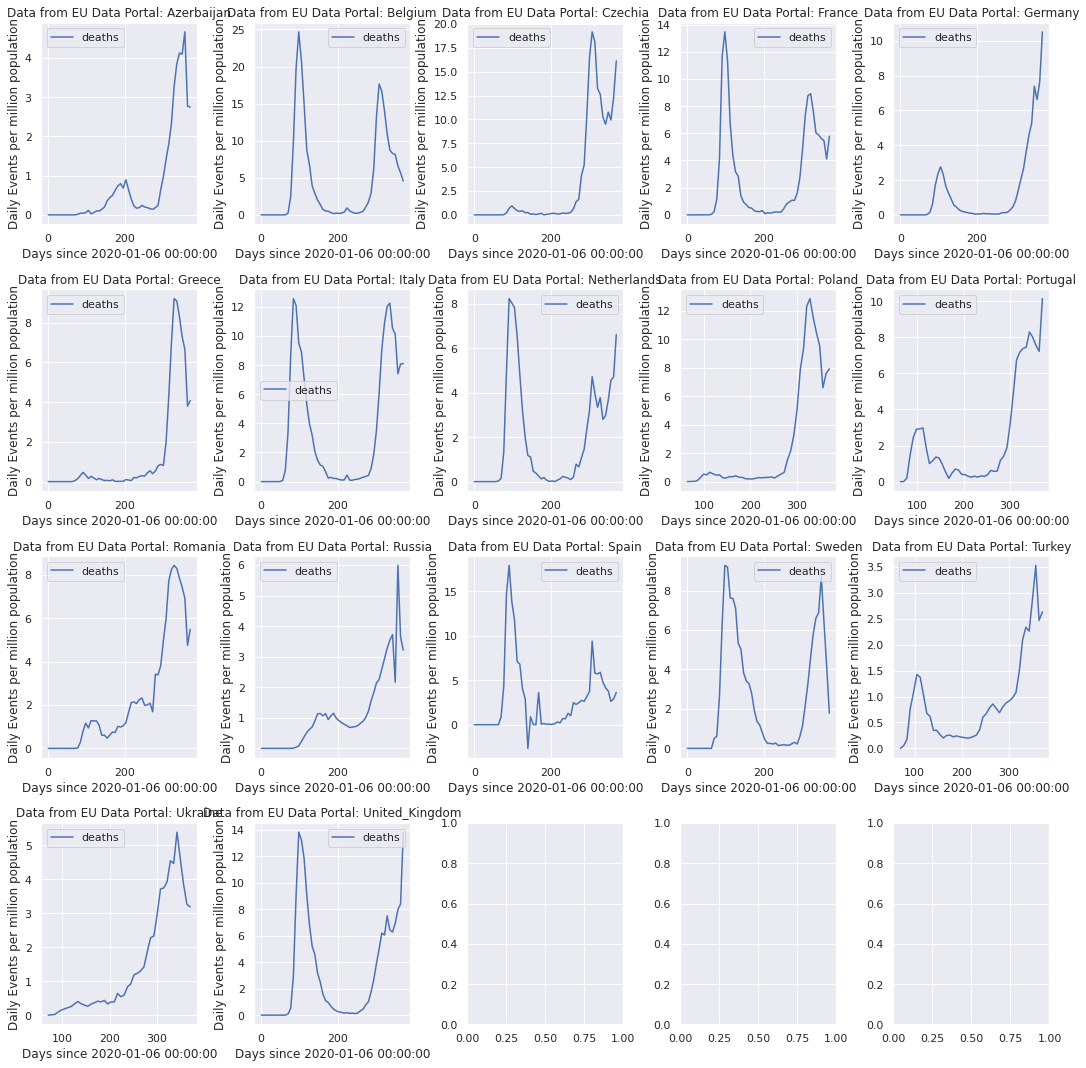

In [29]:
painter = figureFromFrame(None, subplots=subnodeSpec, figsize=(15,15))
for (country,dfExtractOrig) in dtg :
    pop = dfExtractOrig["popData2019"][0]
    print(f"Country={country}, pop:{pop/1.0E6}M")
    dfExtract = dfExtractOrig.set_index("elapsedDays").copy()
    dfExtract.loc[:,"deaths"] = dfExtract.loc[:,"deaths_weekly"]/dfExtract.loc[:,"popData2019"]*1.0E6/7
    painter.doPlot(df = dfExtract.loc[:,["deaths"]])
    painter.setAttrs(label=f"Days since {dateStart}",
                 title=f"Data from EU Data Portal: {country}",
                 legend=True,
                 xlabel=f"Days since {dateStart}",
                 ylabel="Daily Events per million population"   )
        
    painter.advancePlotIndex()  
ImgMgr.save_fig("FIG017B")  

Country=Azerbaijan, pop:10.047719M
Country=Belgium, pop:11.455519M
Country=Czechia, pop:10.6498M
Country=France, pop:67.012883M
Country=Germany, pop:83.019213M
Country=Greece, pop:10.724599M
Country=Italy, pop:60.359546M
Country=Netherlands, pop:17.282163M
Country=Poland, pop:37.972812M
Country=Portugal, pop:10.276617M
Country=Romania, pop:19.414458M
Country=Russia, pop:145.87226M
Country=Spain, pop:46.93706M
Country=Sweden, pop:10.230185M
Country=Turkey, pop:82.003882M
Country=Ukraine, pop:43.993643M
Country=United_Kingdom, pop:66.647112M
Saving figure FIG008


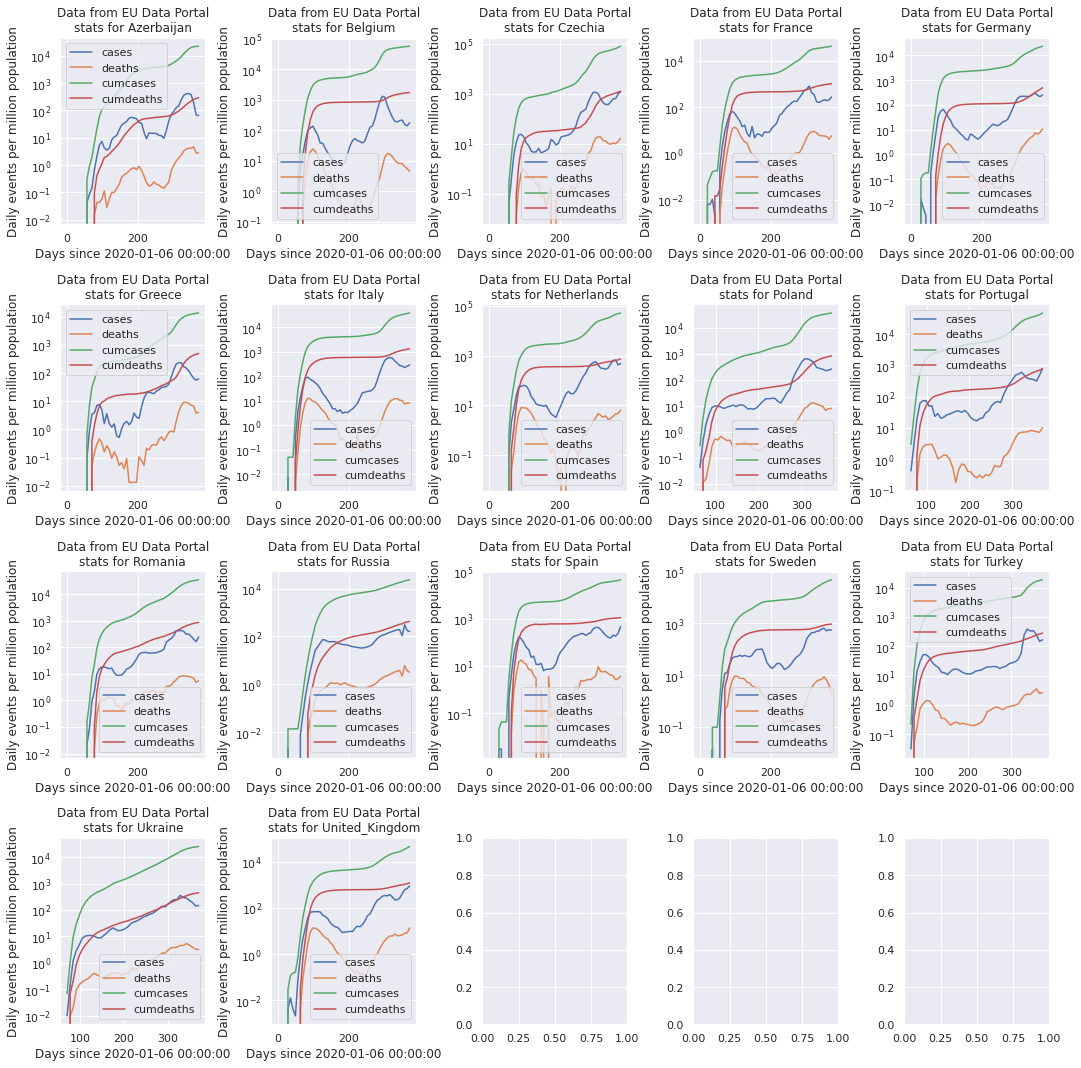

In [30]:
painter = figureFromFrame(None,  subplots=subnodeSpec, figsize=(15,15))
for (country,dfExtractOrig) in dtg :
    pop = dfExtractOrig["popData2019"][0]
    print(f"Country={country}, pop:{pop/1.0E6}M")
    dfExtract = dfExtractOrig.set_index("elapsedDays").copy()
    dfExtract.loc[:,"cumcases"] = dfExtract.loc[:,"cases_weekly"].sort_index().cumsum()/dfExtract.loc[:,"popData2019"]*1.0E6
    dfExtract.loc[:,"cumdeaths"] = dfExtract.loc[:,"deaths_weekly"].sort_index().cumsum()/dfExtract.loc[:,"popData2019"]*1.0E6
    dfExtract.loc[:,"cases"] = dfExtract.loc[:,"cases_weekly"]/dfExtract.loc[:,"popData2019"]*1.0E6/7
    dfExtract.loc[:,"deaths"] = dfExtract.loc[:,"deaths_weekly"]/dfExtract.loc[:,"popData2019"]*1.0E6/7
    painter.doPlot( df = dfExtract.loc[:,["cases","deaths","cumcases","cumdeaths"]],
                      colOpts={"cases": {"yscale":'log'},
                            "deaths": {"yscale":'log'},
                            "cumcases": {"yscale":'log'},
                            "cumdeaths": {"yscale":'log'},})
    painter.setAttrs(label=f"Days since {dateStart}",
                 title=f"Data from EU Data Portal\nstats for {country}",
                 legend=True,
                 xlabel=f"Days since {dateStart}",
                 ylabel="Daily events per million population"   )
    painter.advancePlotIndex()
ImgMgr.save_fig("FIG008")        

### Look at the largest countries

In [31]:
dtx = dt[ dt["popData2019"] > 65.0e6 ]
dtg = dtx.groupby("countriesAndTerritories")
subnodeSpec=(lambda i,j:{"nrows":i,"ncols":j})(*subPlotShape(len(dtg),maxCol=4, colFirst=False))

Country=Bangladesh, pop:163.046173M
Country=Brazil, pop:211.049519M
Country=China, pop:1433.783692M
Country=Democratic_Republic_of_the_Congo, pop:86.790568M
Country=Egypt, pop:100.388076M
Country=Ethiopia, pop:112.078727M
Country=France, pop:67.012883M
Country=Germany, pop:83.019213M
Country=India, pop:1366.417756M
Country=Indonesia, pop:270.625567M
Country=Iran, pop:82.913893M
Country=Japan, pop:126.860299M
Country=Mexico, pop:127.575529M
Country=Nigeria, pop:200.963603M
Country=Pakistan, pop:216.565317M
Country=Philippines, pop:108.116622M
Country=Russia, pop:145.87226M
Country=Thailand, pop:69.625581M
Country=Turkey, pop:82.003882M
Country=United_Kingdom, pop:66.647112M
Country=United_States_of_America, pop:329.064917M
Country=Vietnam, pop:96.462108M
Saving figure FIG009


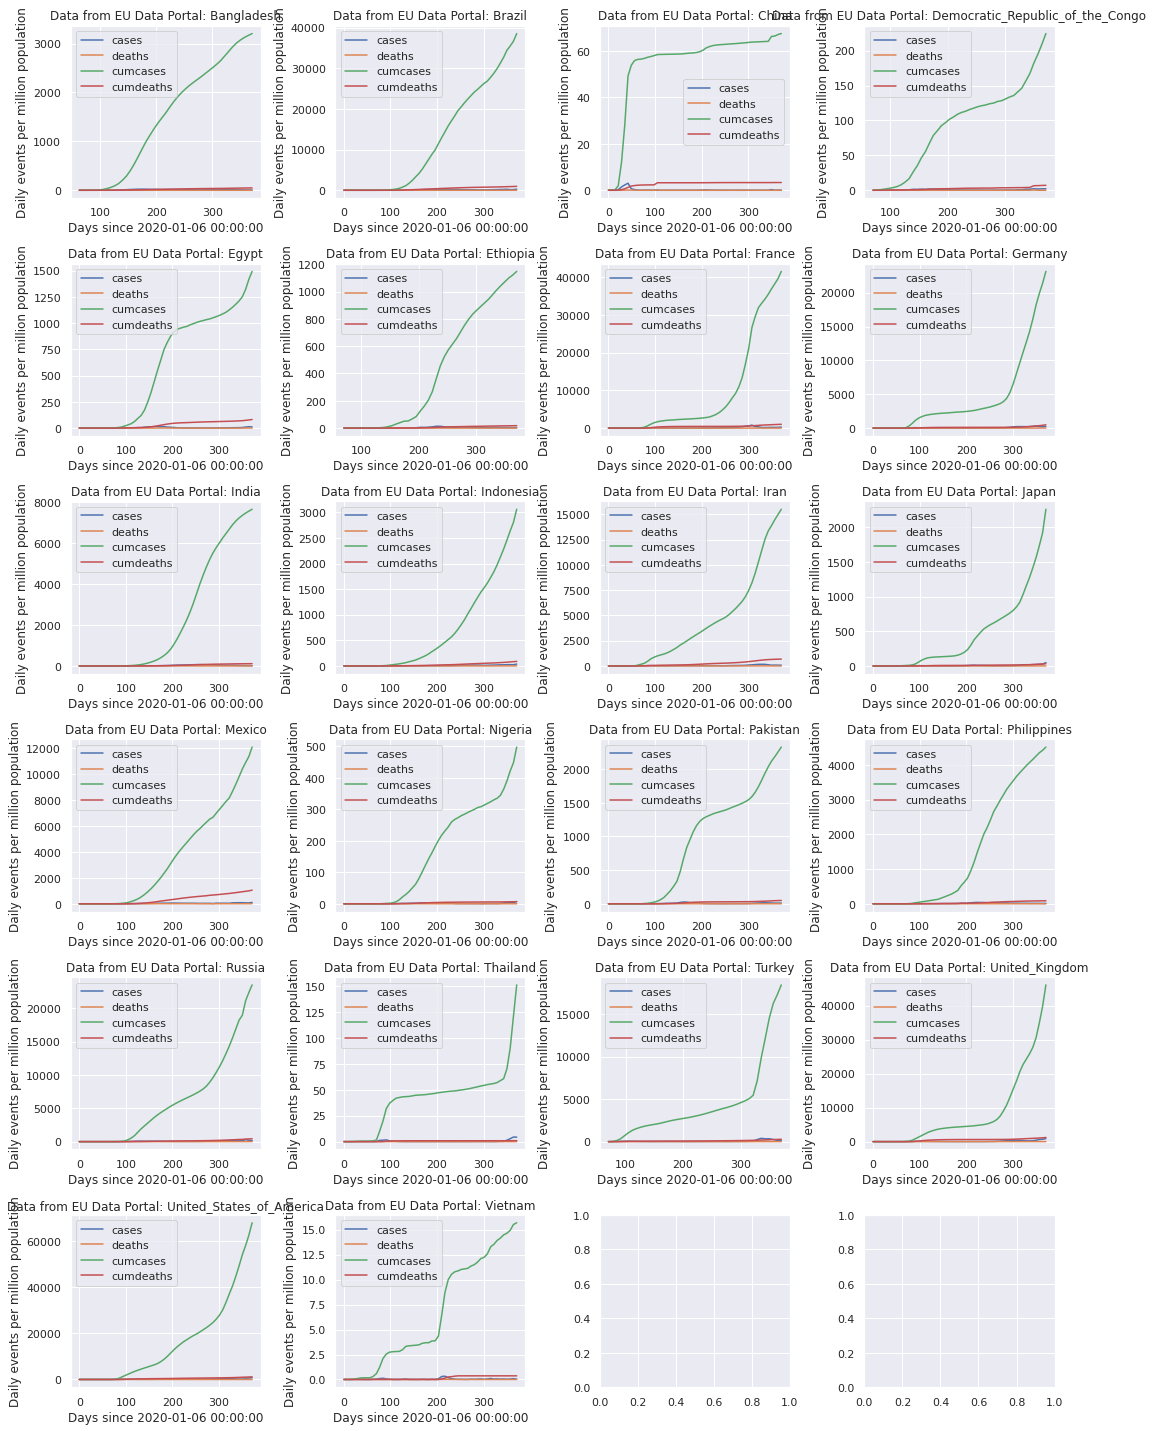

In [32]:
painter = figureFromFrame(None, subplots=subnodeSpec, figsize=(15,20))
for (country,dfExtractOrig) in dtg :
    pop = dfExtractOrig["popData2019"][0]
    print(f"Country={country}, pop:{pop/1.0E6}M")
    dfExtract = dfExtractOrig.set_index("elapsedDays").copy()
    dfExtract.loc[:,"cumcases"] = dfExtract.loc[:,"cases_weekly"].sort_index().cumsum()/dfExtract.loc[:,"popData2019"]*1.0E6
    dfExtract.loc[:,"cumdeaths"] = dfExtract.loc[:,"deaths_weekly"].sort_index().cumsum()/dfExtract.loc[:,"popData2019"]*1.0E6
    dfExtract.loc[:,"cases"] = dfExtract.loc[:,"cases_weekly"]/dfExtract.loc[:,"popData2019"]*1.0E6/7
    dfExtract.loc[:,"deaths"] = dfExtract.loc[:,"deaths_weekly"]/dfExtract.loc[:,"popData2019"]*1.0E6/7
    painter.doPlot(df = dfExtract.loc[:,["cases","deaths","cumcases","cumdeaths"]])
    painter.setAttrs(label=f"Days since {dateStart}",
                 title=f"Data from EU Data Portal: {country}",
                 legend=True,
                 xlabel=f"Days since {dateStart}",
                 ylabel="Daily events per million population"   )
        
    painter.advancePlotIndex()  
ImgMgr.save_fig("FIG009")  

Country=Bangladesh, pop:163.046173M
Country=Brazil, pop:211.049519M
Country=China, pop:1433.783692M
Country=Democratic_Republic_of_the_Congo, pop:86.790568M
Country=Egypt, pop:100.388076M
Country=Ethiopia, pop:112.078727M
Country=France, pop:67.012883M
Country=Germany, pop:83.019213M
Country=India, pop:1366.417756M
Country=Indonesia, pop:270.625567M
Country=Iran, pop:82.913893M
Country=Japan, pop:126.860299M
Country=Mexico, pop:127.575529M
Country=Nigeria, pop:200.963603M
Country=Pakistan, pop:216.565317M
Country=Philippines, pop:108.116622M
Country=Russia, pop:145.87226M
Country=Thailand, pop:69.625581M
Country=Turkey, pop:82.003882M
Country=United_Kingdom, pop:66.647112M
Country=United_States_of_America, pop:329.064917M
Country=Vietnam, pop:96.462108M
Saving figure FIG019


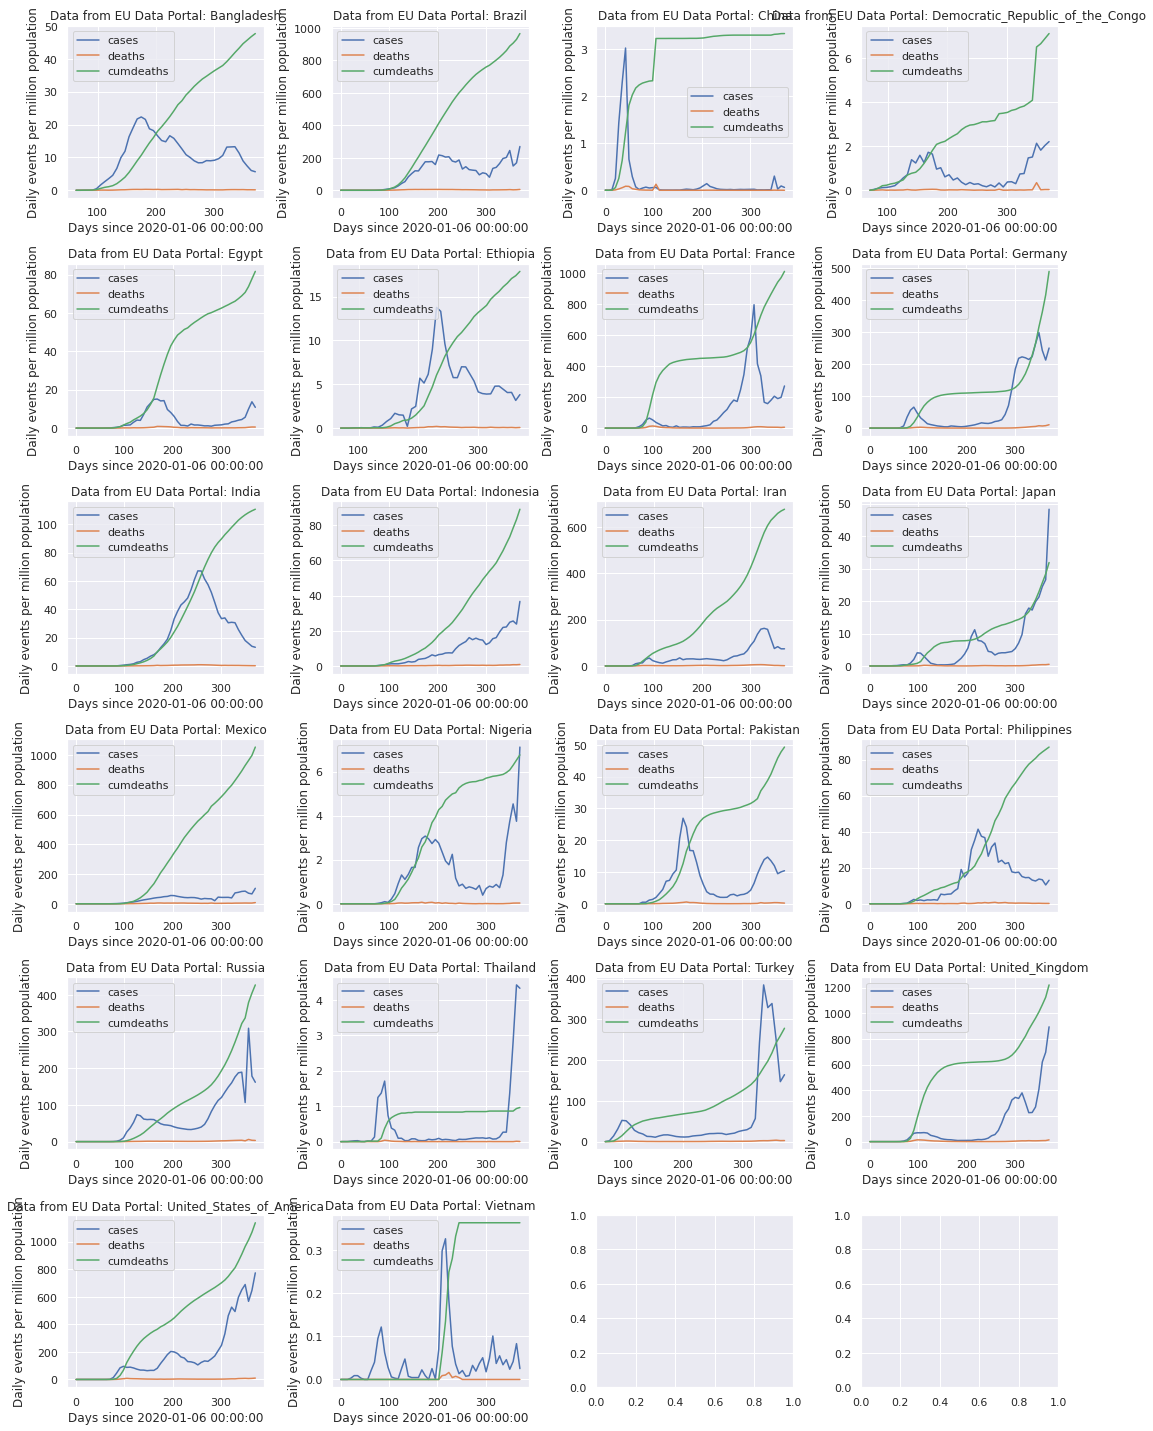

In [33]:
painter = figureFromFrame(None, subplots=subnodeSpec, figsize=(15,20))
for (country,dfExtractOrig) in dtg :
    pop = dfExtractOrig["popData2019"][0]
    print(f"Country={country}, pop:{pop/1.0E6}M")
    dfExtract = dfExtractOrig.set_index("elapsedDays").copy()
    dfExtract.loc[:,"cumdeaths"] = dfExtract.loc[:,"deaths_weekly"].sort_index().cumsum()/dfExtract.loc[:,"popData2019"]*1.0E6
    dfExtract.loc[:,"cases"] = dfExtract.loc[:,"cases_weekly"]/dfExtract.loc[:,"popData2019"]*1.0E6/7
    dfExtract.loc[:,"deaths"] = dfExtract.loc[:,"deaths_weekly"]/dfExtract.loc[:,"popData2019"]*1.0E6/7
    painter.doPlot(df = dfExtract.loc[:,["cases","deaths","cumdeaths"]])
    painter.setAttrs(label=f"Days since {dateStart}",
                 title=f"Data from EU Data Portal: {country}",
                 legend=True,
                 xlabel=f"Days since {dateStart}",
                 ylabel="Daily events per million population"   )
        
    painter.advancePlotIndex()  
ImgMgr.save_fig("FIG019")  

Country=Bangladesh, pop:163.046173M
Country=Brazil, pop:211.049519M
Country=China, pop:1433.783692M
Country=Democratic_Republic_of_the_Congo, pop:86.790568M
Country=Egypt, pop:100.388076M
Country=Ethiopia, pop:112.078727M
Country=France, pop:67.012883M
Country=Germany, pop:83.019213M
Country=India, pop:1366.417756M
Country=Indonesia, pop:270.625567M
Country=Iran, pop:82.913893M
Country=Japan, pop:126.860299M
Country=Mexico, pop:127.575529M
Country=Nigeria, pop:200.963603M
Country=Pakistan, pop:216.565317M
Country=Philippines, pop:108.116622M
Country=Russia, pop:145.87226M
Country=Thailand, pop:69.625581M
Country=Turkey, pop:82.003882M
Country=United_Kingdom, pop:66.647112M
Country=United_States_of_America, pop:329.064917M
Country=Vietnam, pop:96.462108M
Saving figure FIG019B


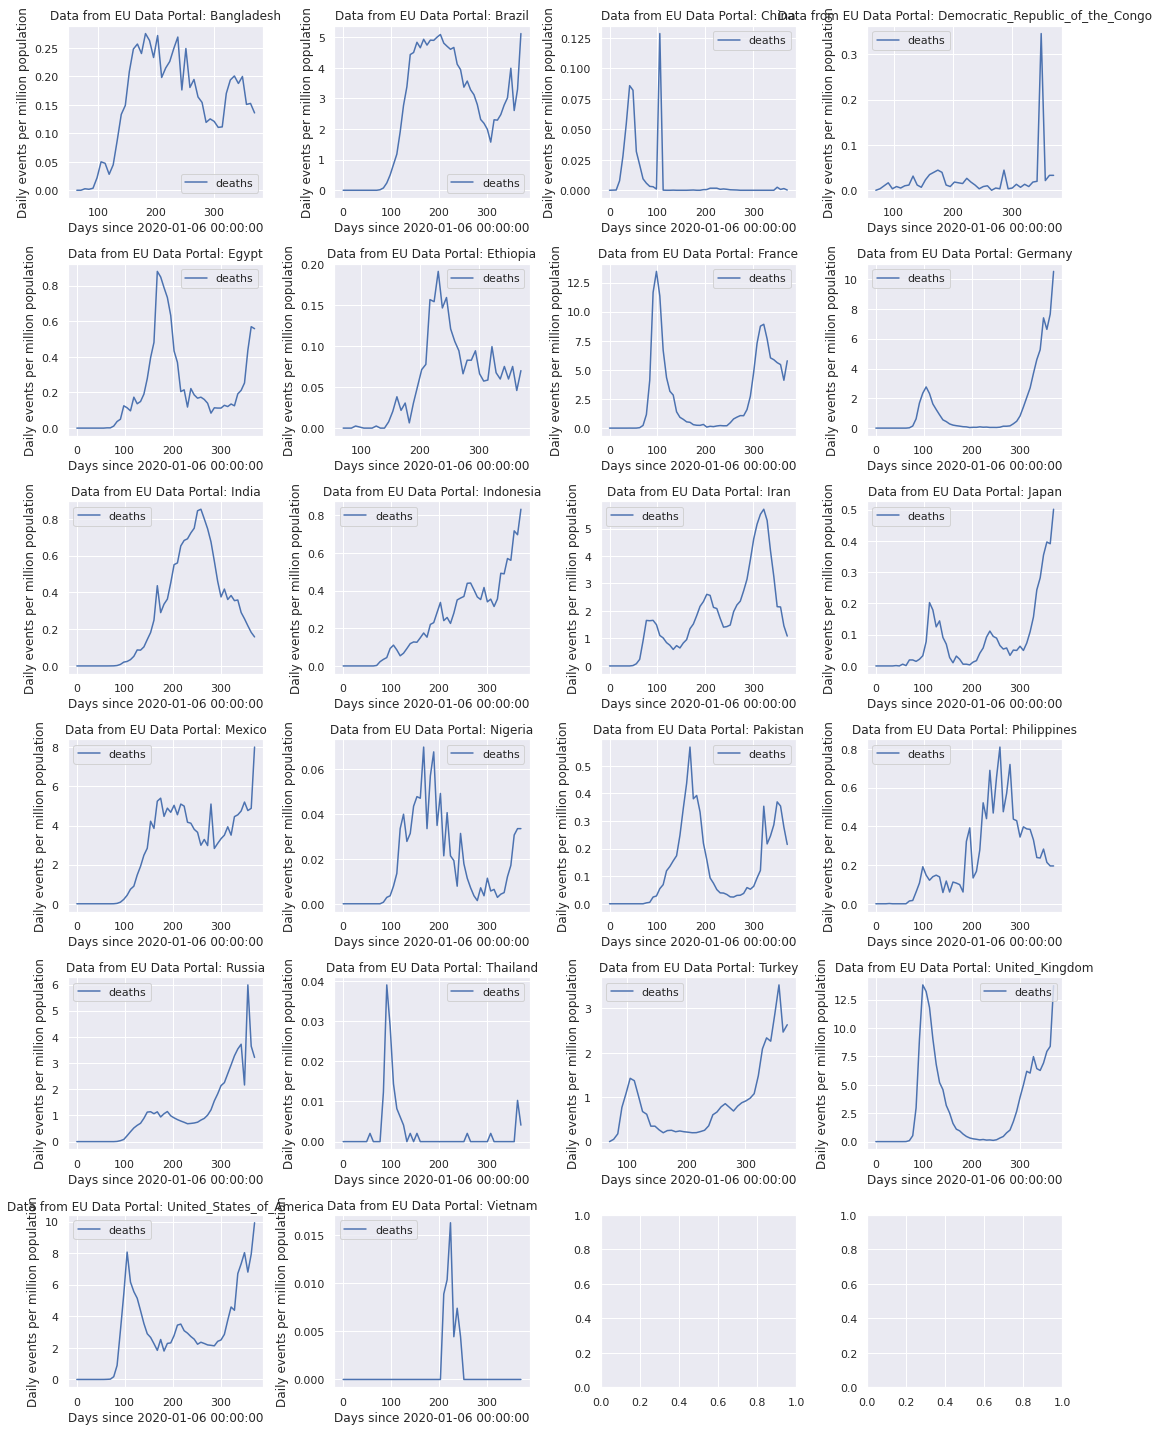

In [34]:
painter = figureFromFrame(None, subplots=subnodeSpec, figsize=(15,20))
for (country,dfExtractOrig) in dtg :
    pop = dfExtractOrig["popData2019"][0]
    print(f"Country={country}, pop:{pop/1.0E6}M")
    dfExtract = dfExtractOrig.set_index("elapsedDays").copy()    
    dfExtract.loc[:,"deaths"] = dfExtract.loc[:,"deaths_weekly"]/dfExtract.loc[:,"popData2019"]*1.0E6/7
    painter.doPlot(df = dfExtract.loc[:,["deaths"]])
    painter.setAttrs(label=f"Days since {dateStart}",
                 title=f"Data from EU Data Portal: {country}",
                 legend=True,
                 xlabel=f"Days since {dateStart}",
                 ylabel="Daily events per million population"   )
        
    painter.advancePlotIndex()  
ImgMgr.save_fig("FIG019B")  

Country=Bangladesh, pop:163.046173M
Country=Brazil, pop:211.049519M
Country=China, pop:1433.783692M
Country=Democratic_Republic_of_the_Congo, pop:86.790568M
Country=Egypt, pop:100.388076M
Country=Ethiopia, pop:112.078727M
Country=France, pop:67.012883M
Country=Germany, pop:83.019213M
Country=India, pop:1366.417756M
Country=Indonesia, pop:270.625567M
Country=Iran, pop:82.913893M
Country=Japan, pop:126.860299M
Country=Mexico, pop:127.575529M
Country=Nigeria, pop:200.963603M
Country=Pakistan, pop:216.565317M
Country=Philippines, pop:108.116622M
Country=Russia, pop:145.87226M
Country=Thailand, pop:69.625581M
Country=Turkey, pop:82.003882M
Country=United_Kingdom, pop:66.647112M
Country=United_States_of_America, pop:329.064917M
Country=Vietnam, pop:96.462108M
Saving figure FIG010


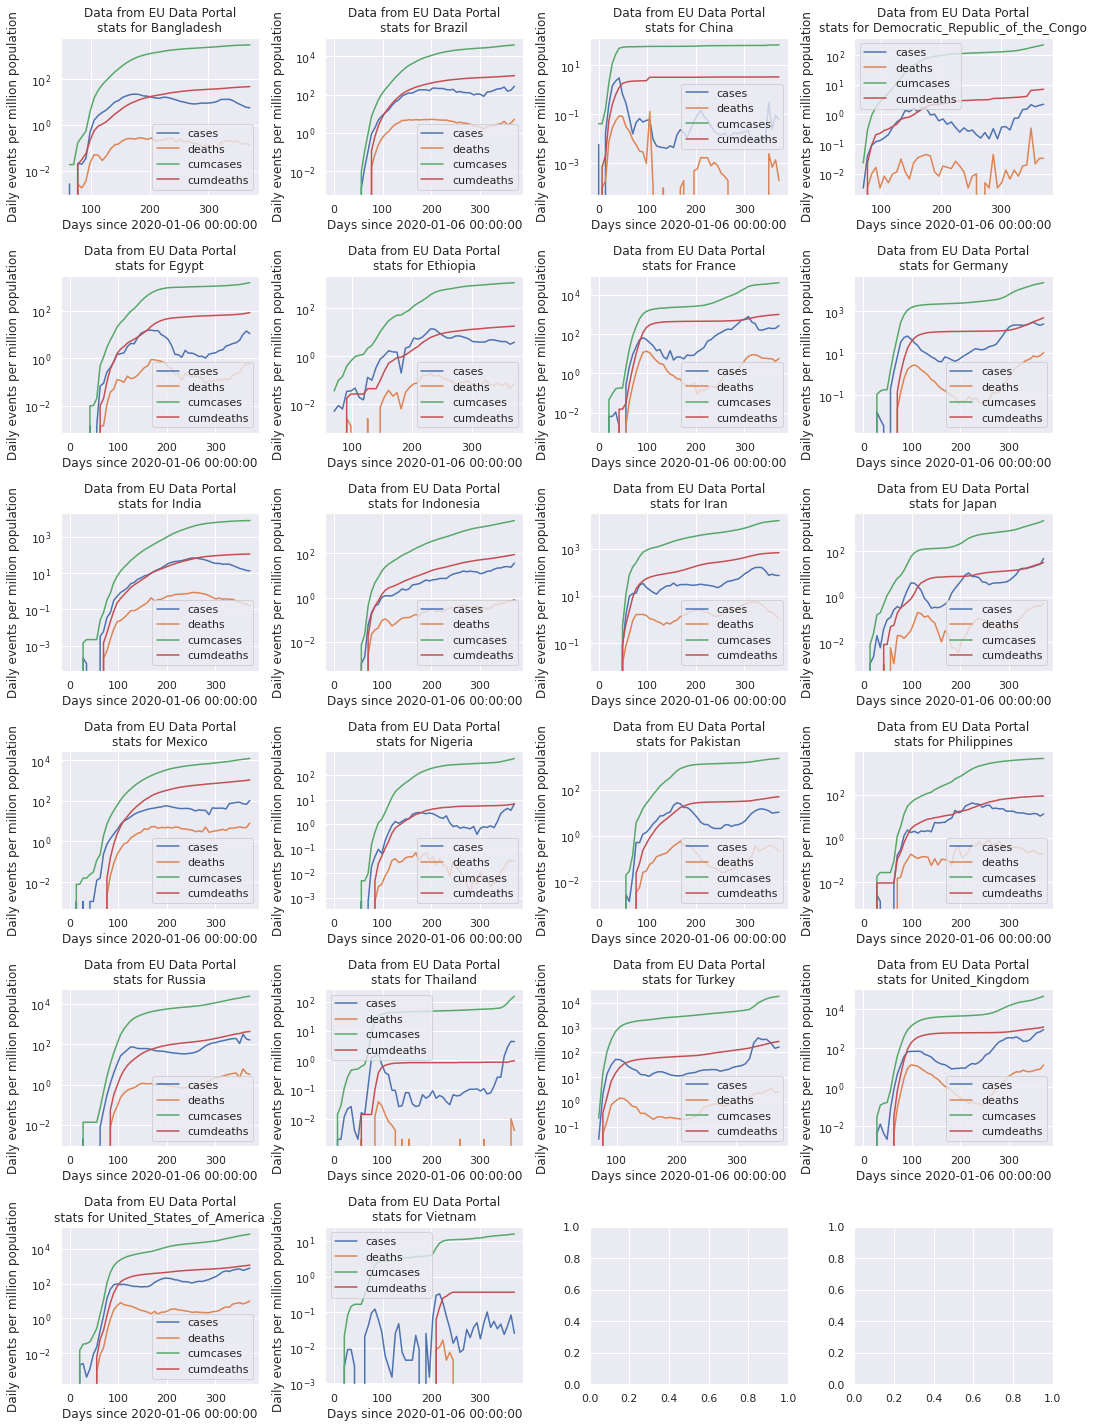

In [35]:
painter = figureFromFrame(None,  subplots=subnodeSpec, figsize=(15,20))
for (country,dfExtractOrig) in dtg :
    pop = dfExtractOrig["popData2019"][0]
    print(f"Country={country}, pop:{pop/1.0E6}M")
    dfExtract = dfExtractOrig.set_index("elapsedDays").copy()
    dfExtract.loc[:,"cumcases"] = dfExtract.loc[:,"cases_weekly"].sort_index().cumsum()/dfExtract.loc[:,"popData2019"]*1.0E6
    dfExtract.loc[:,"cumdeaths"] = dfExtract.loc[:,"deaths_weekly"].sort_index().cumsum()/dfExtract.loc[:,"popData2019"]*1.0E6
    dfExtract.loc[:,"cases"] = dfExtract.loc[:,"cases_weekly"]/dfExtract.loc[:,"popData2019"]*1.0E6/7
    dfExtract.loc[:,"deaths"] = dfExtract.loc[:,"deaths_weekly"]/dfExtract.loc[:,"popData2019"]*1.0E6/7
    painter.doPlot( df = dfExtract.loc[:,["cases","deaths","cumcases","cumdeaths"]],
                      colOpts={"cases": {"yscale":'log'},
                            "deaths": {"yscale":'log'},
                            "cumcases": {"yscale":'log'},
                            "cumdeaths": {"yscale":'log'},})
    painter.setAttrs(label=f"Days since {dateStart}",
                 title=f"Data from EU Data Portal\nstats for {country}",
                 legend=True,
                 xlabel=f"Days since {dateStart}",
                 ylabel="Daily events per million population"   )
    painter.advancePlotIndex()
ImgMgr.save_fig("FIG010")        